## Imports

In [1]:
from sklearn.cluster import KMeans,DBSCAN
from sklearn.metrics import davies_bouldin_score
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
plt.rc('font', size=16)
mpl.rcParams['figure.facecolor'] = 'white'

## Daten einlesen

In [3]:
iris_df = sns.load_dataset("iris")

In [4]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


![Flower](../Bilder/sepal_petal_example.png)

Um eine typische Situation für Clustering zu simulieren, entfernen wir die Labels

In [5]:
X = iris_df.iloc[:,:-1]

In [6]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Clustering mit Evaluation

### K-Means

In [7]:
score = []
k = []

for i in range(2,12,1):
    kmeans_cluster = KMeans(i)
    kmeans_cluster.fit(X)
    score.append(davies_bouldin_score(X, kmeans_cluster.labels_))
    k.append(i)
    
scores = pd.DataFrame({"score":score,"k":k})

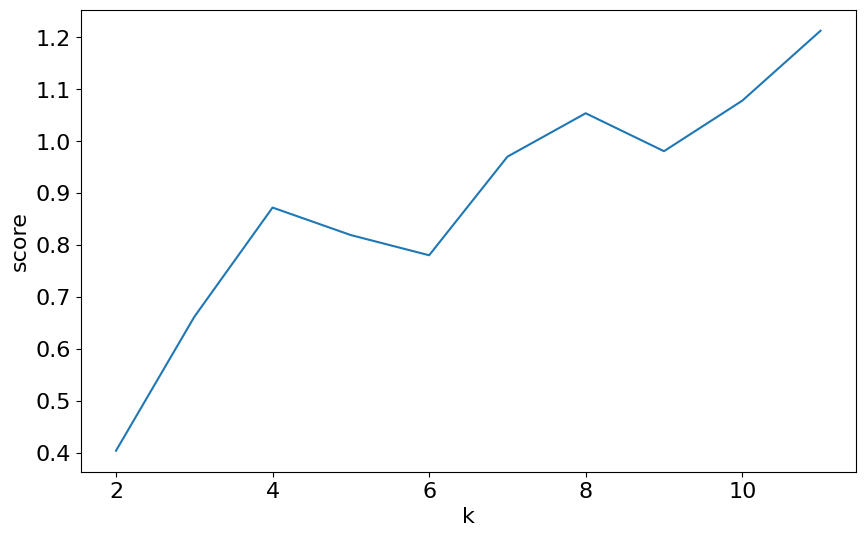

In [8]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=scores, x="k", y="score")
plt.show()

## Plotten der Ergebnisse

In [9]:
kmeans_cluster = KMeans(2)
kmeans_cluster.fit(X)

KMeans(n_clusters=2)

In [10]:
iris_df['pred_labels_kmeans'] = kmeans_cluster.labels_

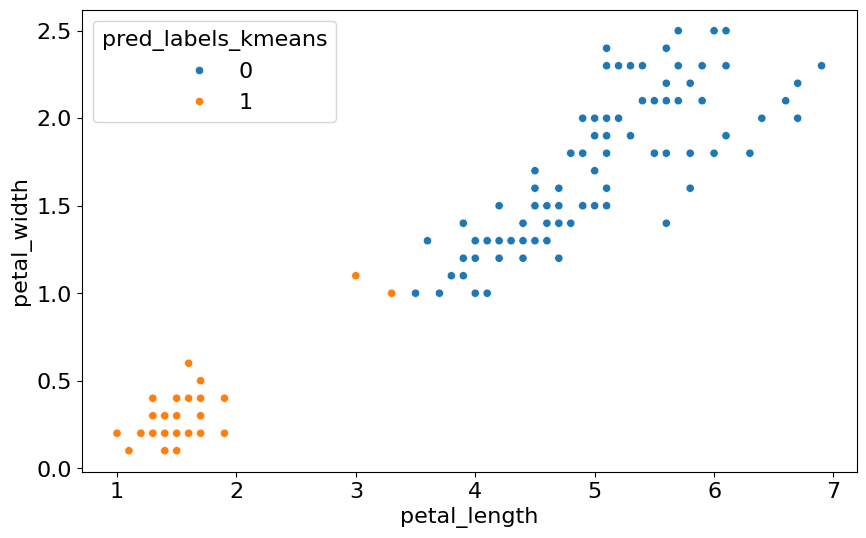

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=iris_df, x="petal_length", y="petal_width", hue="pred_labels_kmeans")
plt.show()

### DBSCAN

In [12]:
score = []
min_samples = []

for i in range(2,12,1):
    dbscan_cluster = DBSCAN(min_samples=i)
    dbscan_cluster.fit(X)
    score.append(davies_bouldin_score(X, dbscan_cluster.labels_))
    min_samples.append(i)
    
score = np.array(score)
score.min()

1.7346688089128242

In [13]:
num_min_samples_index = np.argmin(score)
num_min_samples_index 

2

In [14]:
num_samples = min_samples[num_min_samples_index]
num_samples

4

## Plotten der Ergebnisse

In [15]:
dbscan_cluster = DBSCAN(min_samples=num_samples)
dbscan_cluster.fit(X)

DBSCAN(min_samples=4)

In [16]:
iris_df['pred_labels_dbscan'] = dbscan_cluster.labels_

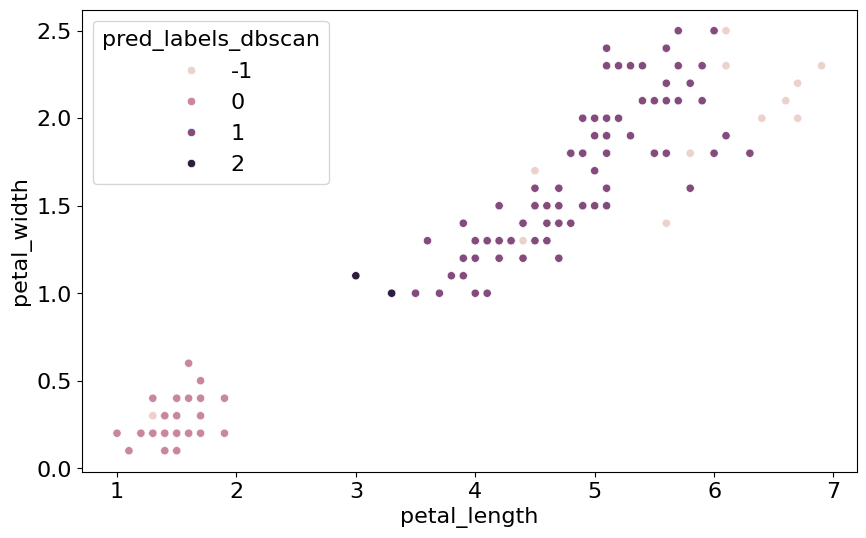

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=iris_df, x="petal_length", y="petal_width", hue="pred_labels_dbscan")
plt.show()

### PCA-Analyse

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [20]:
X_new = pca.transform(X)

In [21]:
cluster_dbscan_pca = DBSCAN(min_samples=4)
cluster_dbscan_pca.fit(X_new)

DBSCAN(min_samples=4)

In [22]:
new_df = pd.DataFrame(X_new)

In [23]:
new_df['pred_labels_dbscan_pca'] = cluster_dbscan_pca.labels_

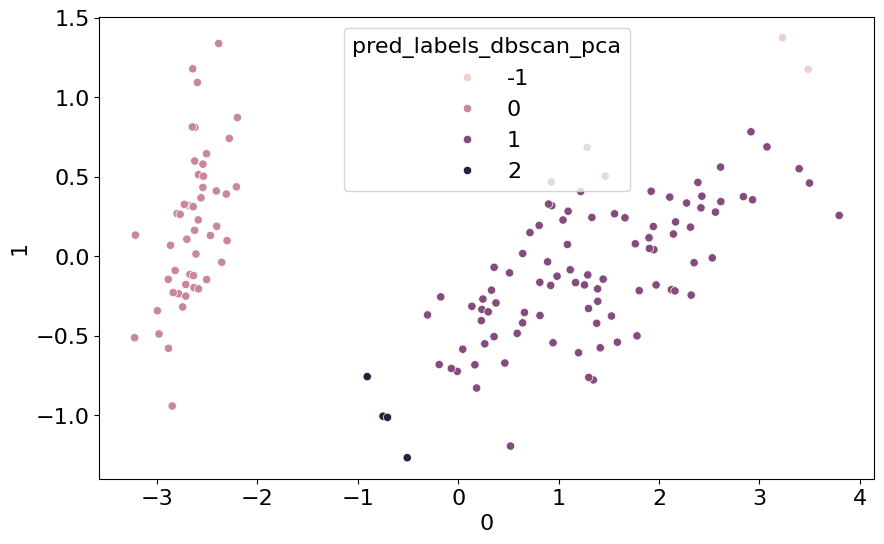

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=new_df, x=0, y=1, hue="pred_labels_dbscan_pca")
plt.show()

In [25]:
new_df.pred_labels_dbscan_pca.unique() ##-1 = Outlier

array([ 0,  1,  2, -1])